## The Program for International Student Assessment (PISA) 
### by (Roman Basulaiman)



## Investigation Overview

> This Analysis  try to find the top Students grade among all the countries and check students gender grades 

## Dataset Overview

> The Program for International Student Assessment (PISA) is a system for international assessments. This system compares students learning outcomes. PISA measures the performance of 15-year-old students in mathematics, science, and reading literacy every 3 years. PISA was first implemented in 2000 in 32 countries. It has since grown to 65 education systems in 2012.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from matplotlib import rcParams

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
cd /Users/Roman/anaconda3/envs/Udacity_2019/Data Vis/Data

/Users/Roman/anaconda3/envs/Udacity_2019/Data Vis/Data


In [6]:
PISA_df=pd.read_csv('PISA_Slides.csv',encoding='latin1')

##  Students Grades in Math, Science and Reading (Visualization 1)

> Most of the students get 500 average scores in Science and Reading while they get 400 average scores in Math  


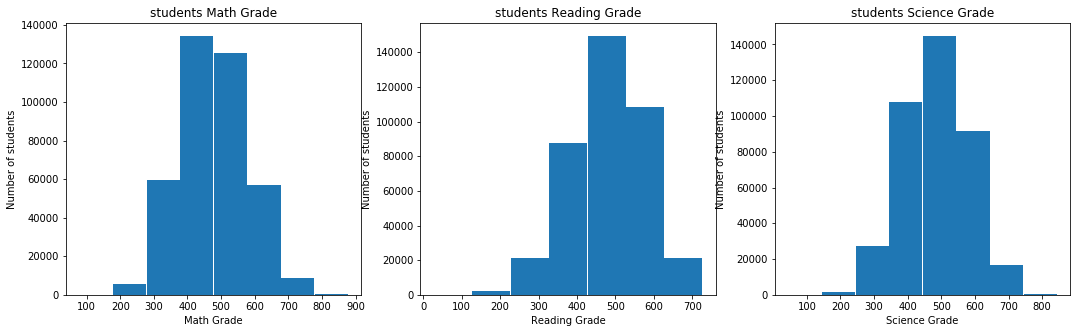

In [14]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 3, 1)
bin_edges = np.arange(PISA_df['Math_Grade'].min()-1,PISA_df['Math_Grade'].max() + 1, 100)
plt.hist(PISA_df['Math_Grade'], bins = bin_edges, rwidth=0.99);
plt.xlabel('Math Grade');
plt.ylabel('Number of students')
plt.title("students Math Grade");


plt.subplot(1, 3, 2)

bin_edges = np.arange(PISA_df['Reading_Grade'].min()-1,PISA_df['Reading_Grade'].max() + 1, 100)
plt.hist(PISA_df['Reading_Grade'], bins = bin_edges, rwidth=0.99);
plt.xlabel('Reading Grade');
plt.ylabel('Number of students')
plt.title("students Reading Grade");

plt.subplot(1, 3, 3)

bin_edges = np.arange(PISA_df['Science_Grade'].min()-1,PISA_df['Science_Grade'].max() + 1, 100)
plt.hist(PISA_df['Science_Grade'], bins = bin_edges, rwidth=0.99);
plt.xlabel('Science Grade');
plt.ylabel('Number of students')
plt.title("students Science Grade");



## The Frequency of Students Gender (Visualization 2)

> there are more female Students who took the exam than Male Students 

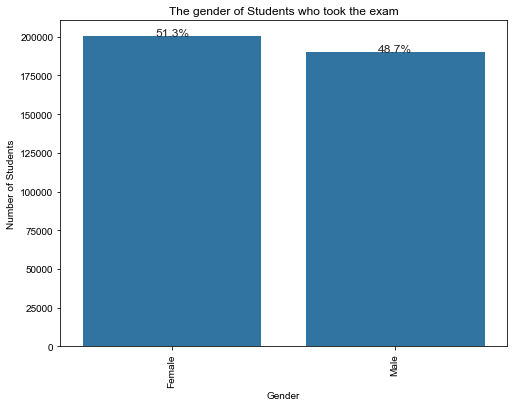

In [15]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = PISA_df, x = 'Gender',color = base_color)
sb.set(rc={'figure.figsize':(5,5)})
# add annotations
n_points = PISA_df.shape[0]
counts = PISA_df['Gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    # get the text property 
    count = counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.xticks(rotation = 90)
    # print the annotation 
    plt.text(loc, count-8, pct_string, ha = 'center')
    plt.ylabel('Number of Students')
    plt.xlabel('Gender')
    plt.title('The gender of Students who took the exam')

## Frequency Students' Grade per Country (Visualization 3)

* Chines Students got high grades only on Math 
* while New Zealander's students were doing better in Reading and Science 
* Singaporean's students appear to be on top 3 countries in all test types 


Text(0.5, 1.0, 'Frequency Students Science Grade for top 3 Countries')

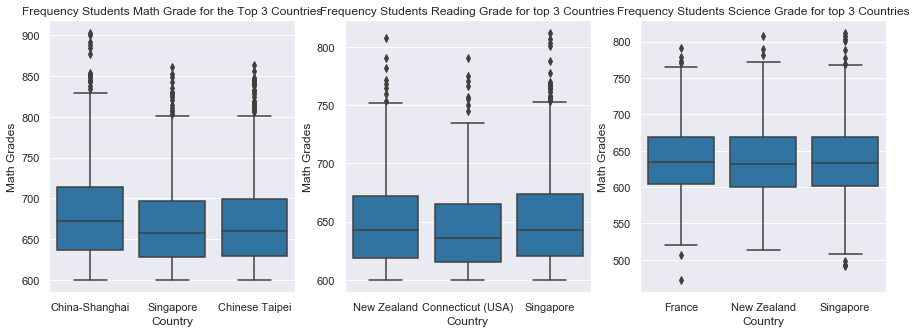

In [19]:
plt.figure(figsize=(15,5))

# Math 
plt.subplot(1, 3, 1)
Math_Grade=PISA_df[PISA_df['Math_Grade']>600].Math_Grade
MG_country=PISA_df[PISA_df['Math_Grade']>600]
MG_country_top3=MG_country[(MG_country['country']=='Chinese Taipei')|(MG_country['country']=='China-Shanghai')|(MG_country['country']=='Singapore')]
sb.boxplot(data = PISA_df, y = Math_Grade, x = MG_country_top3.country, color = base_color )
plt.xlabel('Country')
plt.ylabel('Math Grades')
plt.title('Frequency Students Math Grade for the Top 3 Countries')

# Reading
plt.subplot(1, 3, 2)
Reading_Grade=PISA_df[PISA_df['Reading_Grade']>600].Reading_Grade
RG_country=PISA_df[PISA_df['Reading_Grade']>600]
RG_country_top3=RG_country[(RG_country['country']=='Singapore')|(RG_country['country']=='New Zealand')|(RG_country['country']=='Connecticut (USA)')]
sb.boxplot(data = PISA_df, y = Reading_Grade, x = RG_country_top3.country, color = base_color )
plt.xlabel('Country')
plt.ylabel('Math Grades')
plt.title('Frequency Students Reading Grade for top 3 Countries')


# Science
plt.subplot(1, 3, 3)
Science_Grade=PISA_df[PISA_df['Science_Grade']>600].Reading_Grade
SG_country=PISA_df[PISA_df['Science_Grade']>600]
SG_country_top3=SG_country[(SG_country['country']=='Singapore')|(SG_country['country']=='New Zealand')|(SG_country['country']=='France')]
sb.boxplot(data = PISA_df, y = Science_Grade, x = SG_country_top3.country, color = base_color )
plt.xlabel('Country')
plt.ylabel('Math Grades')
plt.title('Frequency Students Science Grade for top 3 Countries')




## Male and Female Grade per Test (Visualization 4)


> It seems that Male students have higher grades than Female students, while in Reading Female Students have higher scores. on the other hand, both genders have almost the same scores in Science

Text(0, 0.5, 'Science Grades')

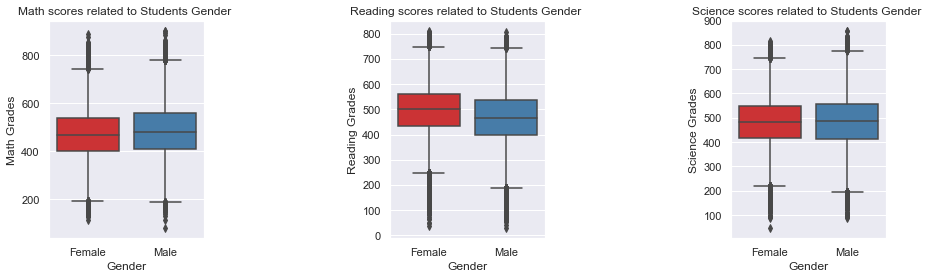

In [20]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)


plt.subplot(1, 3, 1)
sb.boxplot(x = PISA_df['Gender'], y = PISA_df['Math_Grade'], palette = 'Set1')
plt.title('Math scores related to Students Gender ');
plt.ylabel('Math Grades')

plt.subplot(1, 3, 2)
sb.boxplot(x = PISA_df['Gender'], y = PISA_df['Reading_Grade'], palette = 'Set1')
plt.title('Reading scores related to Students Gender ');
plt.ylabel('Reading Grades')

plt.subplot(1, 3, 3)
sb.boxplot(x = PISA_df['Gender'], y = PISA_df['Science_Grade'], palette = 'Set1')
plt.title('Science scores related to Students Gender ');
plt.ylabel('Science Grades')


### Conclusions

This analysis answer the following questions : 

which countries have the highest students score in Math, Reading, and Science? 

I found that China has the highest score in Math only while Singapore has the highest score in all tests. New Zealand has a high score on Reading and Science only.


Dose students from different gender perform differently on a test?  

It seems that Male students have higher grades than Female students, while in Reading Female Students have higher scores. on the other hand, both genders have almost the same scores in Science

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert PISA_Data_Visualization_slides.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!